## A. Importing, cleaning and numerical summaries

In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# 2. Import the data as a pandas DataFrame.
happy = pd.read_csv('EPFL/project-ads-ml-c1-s10-643/data.csv')
happy.head()

Country  Happiness Rank  Happiness Score   Economy    Family    Health  \
0       Norway               1            7.537  1.616463  1.533524  0.796667   
1      Denmark               2            7.522  1.482383  1.551122  0.792566   
2      Iceland               3            7.504  1.480633  1.610574  0.833552   
3  Switzerland               4            7.494  1.564980  1.516912  0.858131   
4      Finland               5            7.469  1.443572  1.540247  0.809158   

    Freedom  Generosity  Corruption  Dystopia  Job Satisfaction  \
0  0.635423    0.362012    0.315964  2.277027              94.6   
1  0.626007    0.355280    0.400770  2.313707              93.5   
2  0.627163    0.475540    0.153527  2.322715              94.5   
3  0.620071    0.290549    0.367007  2.276716              93.7   
4  0.617951    0.245483    0.382612  2.430182              91.2   

           Region  
0  Western Europe  
1  Western Europe  
2  Western Europe  
3  Western Europe  
4  Western Europe

In [16]:
# 3. Check the number of observations.
##we get 153 observations for all variables - 1, and 2 missing for Job Satisfactionb
happy.count()

Country             153
Happiness Rank      153
Happiness Score     153
Economy             153
Family              153
Health              153
Freedom             153
Generosity          153
Corruption          153
Dystopia            153
Job Satisfaction    151
Region              153
dtype: int64

In [318]:
# 4. Obtain the column headings.
happy.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

In [30]:
# 5. Check the data type for each column.
happy.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

In [33]:
# 6. Check if there are any missing values.
##as seen before, 2 missing values in Job Satisfaction
happy.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

In [39]:
# 6. If necessary remove any observations to ensure that there are no missing values 
# and the values in each column are of the same data type.
happy.dropna(inplace=True)
#check
happy.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    0
Region              0
dtype: int64

In [64]:
# 8. Obtain the mean, minimum and maximum value for each column containing numerical data.
summary = pd.DataFrame(columns = ['mean', 'min', 'max'], index = happy.columns[2:11])

for i in summary.index:
    summary.loc[i, 'mean'] = np.mean(happy[i])
    summary.loc[i, 'min'] = np.min(happy[i])
    summary.loc[i, 'max'] = np.max(happy[i])
summary

mean       min       max
Happiness Score    5.35787     2.693     7.537
Economy           0.983895         0   1.87077
Family             1.19051         0   1.61057
Health            0.550794         0  0.949492
Freedom           0.409805         0  0.658249
Generosity        0.244914         0  0.838075
Corruption        0.123008         0  0.464308
Dystopia           1.85491  0.377914   3.11748
Job Satisfaction   75.2099      44.4      95.1

In [68]:
# 9. List the 10 happiest countries.
happy.sort_values(by = 'Happiness Rank')[0:10].Country

0         Norway
1        Denmark
2        Iceland
3    Switzerland
4        Finland
5    Netherlands
6         Canada
7    New Zealand
8         Sweden
9      Australia
Name: Country, dtype: object

In [71]:
# 10. List the 10 least happy countries.
happy.sort_values(by = 'Happiness Rank', ascending = False)[0:10].Country

152    Central African Republic
151                     Burundi
150                    Tanzania
149                       Syria
148                      Rwanda
147                        Togo
146                      Guinea
145                     Liberia
143                       Yemen
142                       Haiti
Name: Country, dtype: object

## B. Indexing and Grouping

In [121]:
# 1. Use the column 'Region' to create a separate DataFrame containing the data points 
#from each of the six regions: 
#North America, Latin America, Western Europe, Eastern Europe, Asia Pacific, Africa.

##personal note: I understood that Europe, consisting of a single observation (Ukraine) should not be taken 
##into account. 
regionSum = pd.DataFrame(columns=['mean happiness', 'score above 6'], index=happy.Region.unique()[0:6])

# 2. Compute the mean happiness score for each region and rank the regions from most happy to least happy.
regionSum['mean happiness'] = happy.groupby('Region')['Happiness Score'].mean()
regionSum.sort_values(by='mean happiness', ascending = False)

# 3. Compute the number of countries in each region that have a happiness score above 6.0.
for i in regionSum.index:
    regionSum.loc[i, 'score above 6'] = (happy.loc[happy.Region == i, 'Happiness Score'] > 6).sum() 
    
regionSum

mean happiness score above 6
Western Europe        6.880474            17
North America         7.154500             2
Asia-Pacific          5.358326            11
Latin America         5.957818            13
Eastern Europe        5.498952             1
Africa                4.254581             0

In [130]:
# 4. Compute the difference between the maximum and minimum happiness score for each region. 
# Which region has the largest range of happiness scores?
for i in regionSum.index:
    regionSum.loc[i, 'range'] = happy.loc[happy.Region == i, 'Happiness Score'].max() - happy.loc[happy.Region == i, 'Happiness Score'].min()

regionSum.sort_values(by='range', ascending=False).head(1)

mean happiness score above 6  range
Asia-Pacific        5.358326            11  3.852

## C. Bar plot of the Happiness Score

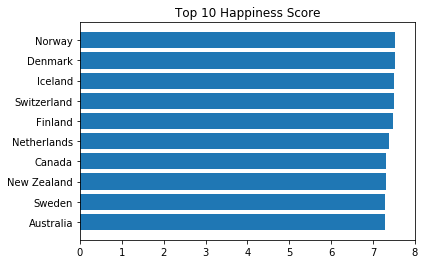

In [170]:
#Obtain a horizontal bar plot of the Happiness Score of the top 10 countries. 
#Your bar chart should have the names of the countries are listed vertically 
#along the y-axis and the x-axis should have labels for each number from 0 to 8. 
#Ensure that the chart has an appropriate title and labels.

happyscore = happy.sort_values(by = 'Happiness Rank')[0:10]['Happiness Score']
top10countries = happy.sort_values(by = 'Happiness Rank')[0:10].Country
y_pos = np.arange(len(top10countries))
x_pos = np.arange(8)

fig, ax = plt.subplots()

ax.barh(y_pos, happyscore, tick_label = top10countries)
ax.set_yticks(y_pos)
ax.invert_yaxis() 
ax.set_xlim(0,8)
ax.set_title('Top 10 Happiness Score')
plt.show()

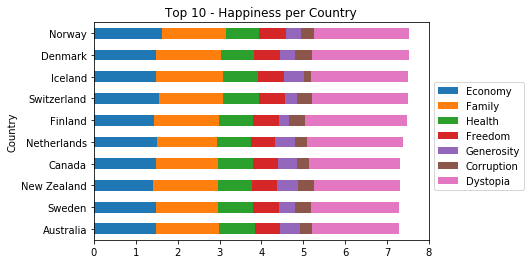

In [251]:
happyscore2 = happy.sort_values(by = 'Happiness Rank')[0:10]
happyscore2.set_index('Country', inplace=True)
happyscore2.iloc[:, 2:9].plot.barh(stacked=True)
plt.title('Top 10 - Happiness per Country')
plt.xlim(0, 8)
plt.gca().invert_yaxis()
plt.legend(loc='upper left', bbox_to_anchor=(1, .75))
plt.show()

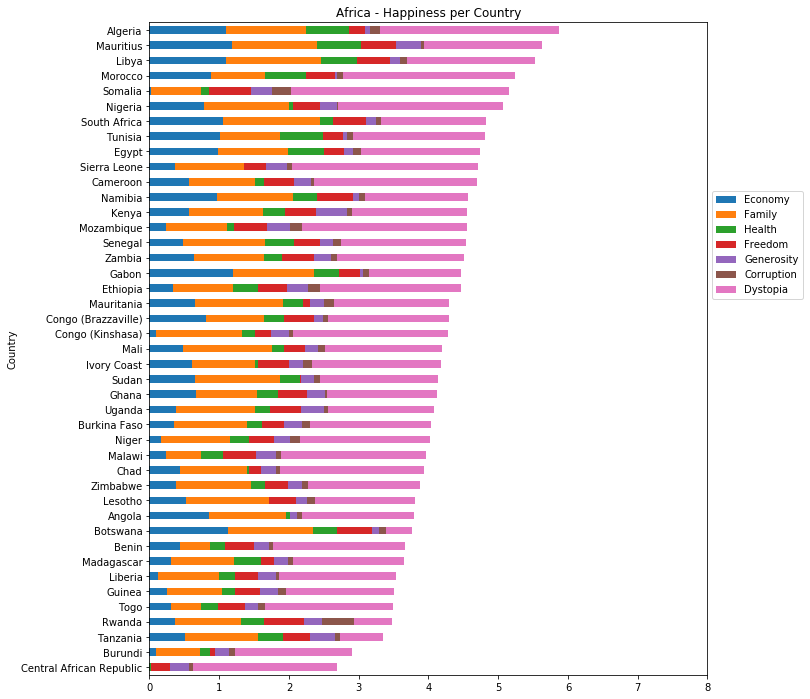

In [252]:
#Obtain the same stacked horizontal bar chart as in step 2 
#but this time instead of the top 10 countries consider all countries from the region Africa.

happyAfrica = happy[happy.Region=='Africa']
happyAfrica.set_index('Country', inplace=True)

happyAfrica.iloc[:, 2:9].plot.barh(stacked=True, figsize=(10, 12))
plt.legend(loc='upper left', bbox_to_anchor=(1, .75))
plt.gca().invert_yaxis()
plt.title('Africa - Happiness per Country')
plt.xlim(0, 8)
plt.show()


## D. Histogram of Job Satisfaction

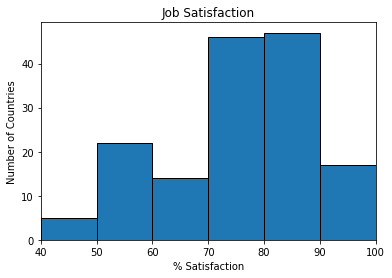

In [270]:
plt.hist(happy['Job Satisfaction'], bins= np.arange(40, 110, 10), edgecolor = 'black')
plt.title('Job Satisfaction')
plt.ylabel('Number of Countries')
plt.xlabel('% Satisfaction')
plt.xlim(40, 100)
plt.show()

## E. Pairwise Scatter plots

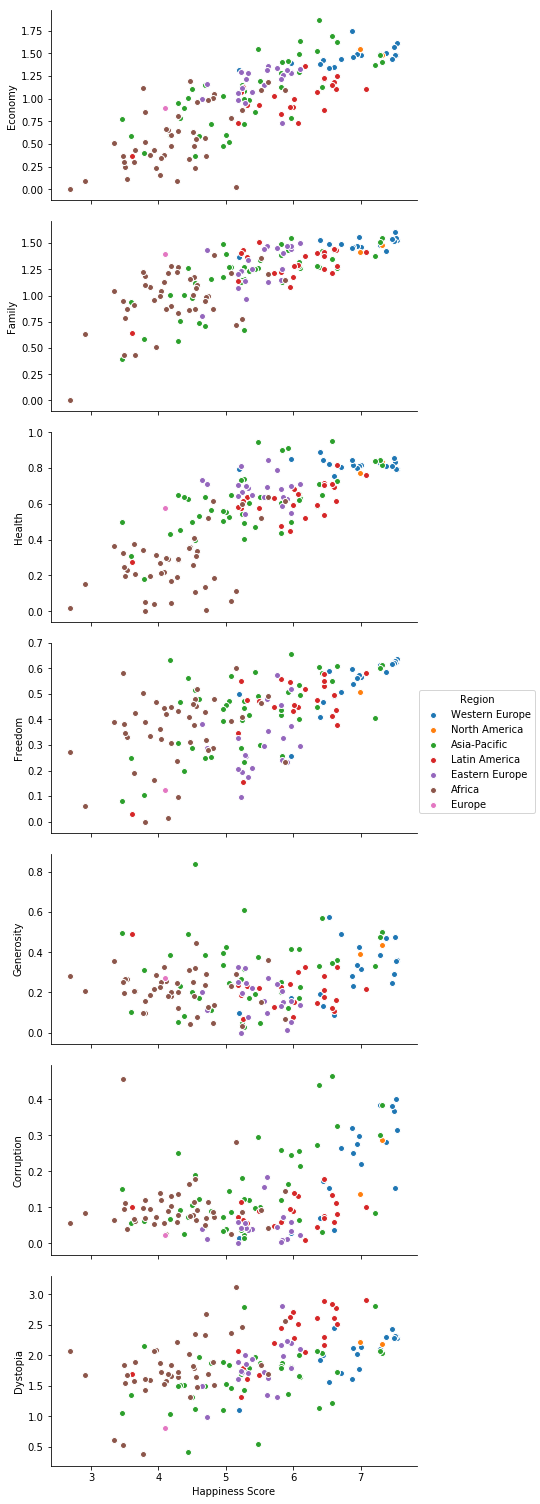

In [330]:
sns.pairplot(happy, 
             x_vars='Happiness Score', 
             y_vars=['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia'],
             hue='Region',
            size = 3, aspect = 2)



## F. Correlation

In [328]:
happy.iloc[:, 2:10].corr().iloc[1:, :1]

#Economy has the biggest correlation to Happiness

Happiness Score
Economy            0.808678
Family             0.749612
Health             0.777731
Freedom            0.567948
Generosity         0.164123
Corruption         0.438262
Dystopia           0.481117

## G. Probabilities

In [349]:
# Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. 
# You will have to use pandas to count the appropriate quantities.

##Using conditional probas, proba of country with score above 6 being from WE
## is equal to proba to be from WE AND having a core > 6 divided by the proba of having a score > 6.

##proba of having a score >6 AND being in WE
##Note: I took len(happy.Region) to get total number of obs.
bANDa = regionSum.loc['Western Europe', 'score above 6'] / len(happy.Region)

##proba of having a score > 6
over6 = (happy['Happiness Score'] > 6).sum()/ len(happy.Region)

pWEknowingOver6 = bANDa / over6
pWEknowingOver6

## ca. 38.6% of chances of being in WE

0.38636363636363641

## H. Matrices

In [379]:
## I reindexed happy with   happy.set_index('Country', inplace=True)

mat = pd.DataFrame(index = happy.index, columns=happy.Region.unique())

for i in mat.index:
    mat.loc[i,:] = (happy.loc[i].Region == mat.columns)*1

mat

Western Europe  North America  Asia-Pacific  \
Country                                                                 
Norway                                 1              0             0   
Denmark                                1              0             0   
Iceland                                1              0             0   
Switzerland                            1              0             0   
Finland                                1              0             0   
Netherlands                            1              0             0   
Canada                                 0              1             0   
New Zealand                            0              0             1   
Sweden                                 1              0             0   
Australia                              0              0             1   
Israel                                 0              0             1   
Costa Rica                             0              0             0   
Austria                                1              0             0   
United States                          0              1             0   
Ireland                                1              0             0   
Germany                                1              0             0   
Belgium                                1              0             0   
Luxembourg                             1              0             0   
United Kingdom                         1              0             0   
Chile                                  0              0             0   
United Arab Emirates                   0              0             1   
Brazil                                 0              0             0   
Czech Republic                         1              0             0   
Argentina                              0              0             0   
Mexico                                 0              0             0   
Singapore                              0              0             1   
Malta                                  1              0             0   
Uruguay                                0              0             0   
Guatemala                              0              0             0   
Panama                                 0              0             0   
...                                  ...            ...           ...   
Georgia                                0              0             1   
Congo (Kinshasa)                       0              0             0   
Mali                                   0              0             0   
Ivory Coast                            0              0             0   
Cambodia                               0              0             1   
Sudan                                  0              0             0   
Ghana                                  0              0             0   
Ukraine                                0              0             0   
Uganda                                 0              0             0   
Burkina Faso                           0              0             0   
Niger                                  0              0             0   
Malawi                                 0              0             0   
Chad                                   0              0             0   
Zimbabwe                               0              0             0   
Lesotho                                0              0             0   
Angola                                 0              0             0   
Afghanistan                            0              0             1   
Botswana                               0              0             0   
Benin                                  0              0             0   
Madagascar                             0              0             0   
Haiti                                  0              0             0   
Yemen                                  0              0             1   
Liberia    